# Project2: Investigate a Dataset (TMDb movie data)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#References">References</a></li>
</ul>

## 1. Introduction
<a id='intro'></a>

This data set is reflecting information regarding movies from The Movie Database (TMDb). The information represents each movie generse, rating, popularity, release date, cast and directors, budget, revenue, and etc. 
The data analysis process aims to highlight relationships between the data set attributes, such as whether a specific year has the highest percentage of popularity. 
This project will utilize NumPy, MatPlotLib, and Pandas. Starting by forming the dataset into a frame, exploring, cleaning, visualizing, and answering the questions. Eventually, this report will answer the following 4 research questions: 
<ol>
<li>What year contains the highest number of movie releases?</li>
<li>Would newer movies be more popular than older movies?</li>
<li>Does longer runtime affect the popularity of the movie?</li>
</ol>

   #### Retriving needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling

#### General Properties

Loading the data set then printing few lines of it

In [3]:
#We will load few lines of the data set to generate a general idea around it
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Finding the properties of the dataset attributes 

In [4]:
#This will help in identfying the attributes types and whether we have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Using the Describe method to gain some statistics on the dataset, this will help in providing a general idea on the dataset

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


There are 20 different attributes in the data set. As the analysis will focus on answering the research questions, the non-relating attributes will be removed, this will involve:
<ul>
    <li>ID and imdb_id, as it is a unique identifier that will not provide any information on the potential relationships.</li>
    <li>Budget adj and revenue adj will not be needed as the budget and revenue columns will be used. </li>
    <li>Homepage is not being used. </li>
     <li>Tagline, keywords, and overview are providing details on each movie, which will be useful if we are intending to study each video separately or the top 10 movies. Yet, this is not within the scope of this project. 
    <li>Release_date can be replaced by the release year as it is more general with fewer unique values </li>
    <li>Production companies will be replaced with the director, as the focus on the director work rather than the company as a whole. In addition, each director may work with different companies.</li>
    <li>Vote count and vote average will not be used, as the popularity attribute will provide enough indication on the movie rating</li>
</ul>    

In [6]:
#Droping those attributes will help us to focus more on the values we aim to study
df.drop(['imdb_id','id','homepage','tagline','keywords','overview','budget_adj','revenue_adj','production_companies','vote_count','vote_average','release_date'], axis=1, inplace= True)

In [7]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015


### Data Cleaning (Duplication and Null values)

The resulting attributes are 8, with some problems that need fixing in the next step 

In [10]:
#let's see the information of the remaining columns to check for problems
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   release_year    10866 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 764.1+ KB


#### Handling duplication 

In [11]:
#this function will work on two parts, first it will detect any duplications and print the amount of duplicate rows.
#Then, it will drop those duplicate values and verify there are no more duplicates
def handling_dup():
    print('The are', sum(df.duplicated()), 'number of duplicate values need to be handled')
    df.drop_duplicates(inplace=True)
    print('Now there is', sum(df.duplicated()), 'duplicate values')

In [12]:
#calling the function to detect any duplication problems and handling it
handling_dup()

The are 1 number of duplicate values need to be handled
Now there is 0 duplicate values


The problems in the data set are as follow:
<ol>
    <li>1 duplicate row</li>
    <li>Missing data in cast, director, and genres </li>
</ol>    

#### Handling missing data

In [13]:
#start by identifying the missing values in the data set
QuantityNull= df.isnull().sum()
print('There are missing values as follow:',"\n",QuantityNull)

There are missing values as follow: 
 popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_year       0
dtype: int64


In [14]:
#This function will work on calculating the percentage of the missing data from the overall data entries. 
#This is to compare it with the threshold of 15%
for n in QuantityNull:
    percentage='{0:.2g}'.format(n/10866*100)
    print('The missing value percentage from the overall data entries is ', percentage)

The missing value percentage from the overall data entries is  0
The missing value percentage from the overall data entries is  0
The missing value percentage from the overall data entries is  0
The missing value percentage from the overall data entries is  0
The missing value percentage from the overall data entries is  0.7
The missing value percentage from the overall data entries is  0.4
The missing value percentage from the overall data entries is  0
The missing value percentage from the overall data entries is  0.21
The missing value percentage from the overall data entries is  0


In [15]:
#since the percentage of missing values are below the threshold of 15%, meaning they are small in number 
#which will not affect the analysis flow, therefore the rows will be dropped
#Rows with missing Object type data has been dropped. As filling them with the most redudent value may not provide accuarte results.
df.dropna(inplace=True)
df.isnull().sum()    

popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_year      0
dtype: int64

The above code is used to detect and handle missing values. 
Starting by identifying the columns with missing values, then calculating the percentage of the missing values from the overall data entries. A 15% threshold has been set to determine whether the missing values are small or large in the amount. If the missings are below the threshold, the row will be simply dropped. If the missings for a specific column are beyond the threshold, the whole column will be dropped. 
In our case, all columns' missing values are below the set threshold, therfore the rows are simply droppped.

<a id='eda'></a>
## 3. Exploratory Data Analysis

### Research Question 1 (What year contains the highest number of movie releases?)

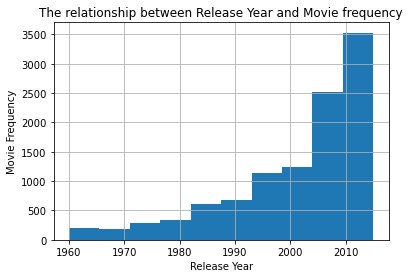

In [16]:
#we will use a histogram to express how the number of movies will change over time
df['release_year'].hist()
plt.title("The relationship between Release Year and Movie frequency")
plt.xlabel("Release Year")
plt.ylabel("Movie Frequency");

Most movies are from later years and around the average of 2001. This may be the result of having more proper documentation on movies in later years

### Research Question 2  (Would newer movies be more popular than older movies?)

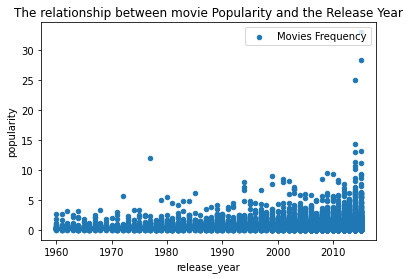

In [17]:
#the scatter plot will help in highlighting how the movies are distributed based on the popularity
df.plot(x='release_year', y='popularity', kind='scatter')
plt.title("The relationship between movie Popularity and the Release Year")
plt.legend(['Movies Frequency'], loc='upper right');

The above scatter plot relfects an increase in the movies popularity with newer years. With the 3 most popular movies being released in the later years. This may be the result of having more movies documented in later years, more entritaining movies, spreaded advertising, or incresing popultions' intrest in movies industry which will entail increasing tendency toward talking about them, resulting in higher popularity.

### Research Question 3  (Does longer runtime affect the popularity of the movie?)

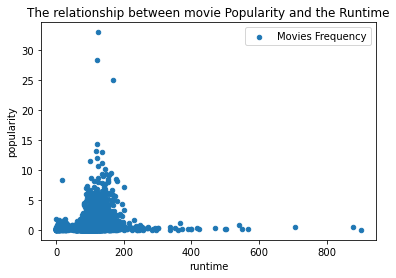

In [18]:
#the scatter plot will help in identifying the relationship between the popularity and the runtime
df.plot(x='runtime', y='popularity', kind='scatter')
plt.title("The relationship between movie Popularity and the Runtime")
plt.legend(['Movies Frequency'], loc='upper right');

The above scatter plot highlights a relationship between the runtime and popularity. It indicates that most popular movies does not have long runtime. Where most of the popular movies are those around the average runtime of 102. So, the more the movie have an average runtime, the more likely it will be popular. This may be the result of having fewer people with an intrest to watch long movies.

<a id='conclusions'></a>
## Conclusions
The data set represents some information regading movies in The Movie Database (TMDb) with 20 attributes. This project studied different attributes to spot the relationships between them, where the focus of this project is mostly on the Year and the Popularity. A scatter plot and a histogram have been used to visulize the relationships. The analysis highlights that most of the movie documented were from later years, espcially around the average year of 2001.With an increase of popularity over time, movies in later years are scoring higher popularity rates. Additionally, movies with average runtime are more likely to be popular than those with longer runtimes.  

Some limitation the analysis faced is that the movies in the data set tend to increase in later years. Meaning that earlier years have fewer quantity of movies. This may be misleading the analysis process, as the average values and frequencies will be centered around the later years even if that does not necessarily mean those years are actually containing higher number of movies releases. This can also affecct the Year-Popularity analysis, as later years may appear to have higher popularity wheres actually it is becaues of lack of data in early years and having more data in later years. Eventually, the analysis process may appear to be baised. This may be the result of lack of documentation in early years or simply not having each old movie documented in The Movie Database (TMDb).

For future work, a sample will be equally taken from different years. this is to balance the uneven data distribution and gain more accurate results for the analysis. The same attributes will be taken and studied, but with the new equally distributed sample. An additional point to study would be the geners. The relationship between the year and geners will be furthur studied to spot whether some years faced raise in a specific generes and the reseans behind this trend. Furthurmore, a great indication of populrity could be the director or production company. It would be helpful to spot whether a specific director or production company is related to high popularity.


<a id='references'></a>
## References
<ul>
    <li> https://machinelearningmastery.com/handle-missing-data-python/ </li>
    <li> https://pandas.pydata.org/docs/reference/index.html </li>
</ul>